In [ ]:
## ML in Omics - Practical Session 1: Complete Exercise Solutions
# Date: January 12, 2026  
# Topic: ML basics with sklearn - Cell Type Prediction  
# GitHub Repository: https://github.com/csbg/ML_in_omics

## Exercise Objectives
# This practical session aims to:
# 1. Set up your Python environment for ML in omics
# 2. Load and explore single-cell RNA-seq data using AnnData
# 3. Preprocess omics data (normalization and filtering)
# 4. Train a logistic regression model using scikit-learn
# 5. Evaluate model performance with proper train/test splitting
# 6. Understand the complete ML workflow for cell type prediction

In [1]:
### Setup and Loading Data
# Import packages 
import anndata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Sanity check
import sys
print(sys.executable)

/opt/anaconda3/envs/ml_omics/bin/python3.9


In [3]:
# Import data
data = anndata.read_h5ad("data/my_dataset_small.h5ad")

In [4]:
# Data overview
print("=" * 50)
print("DATASET OVERVIEW")
print("=" * 50)
print(data)

print(f"\nNumber of cells: {data.n_obs}")
print(f"Number of genes: {data.n_vars}")
print(f"\nData matrix type: {type(data.X)}")
print(f"Data matrix shape: {data.X.shape}")

DATASET OVERVIEW
AnnData object with n_obs × n_vars = 2988 × 33159
    obs: 'ClassAnn', 'Subclass', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'total_genes', 'total_UMIs', 'sample_id', 'cluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'Chromosome', 'End', 'Gene', 'Start', 'Strand', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'batch_condition', 'citation', 'organism', 'organism_ontology_term_id', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_UMAP', 'X_tSNE'

Number of cells: 2988
Number of gen

In [5]:
# Priting data matrix
print("\n" + "=" * 50)
print("DATA MATRIX (X)")
print("=" * 50)

print(f"Shape: {data.X.shape}")
print(f"Type: {type(data.X)}")
print(f"Data type: {data.X.dtype}")

print("\nFirst 5 cells, first 5 genes:")
if hasattr(data.X, "toarray"):
    print(data.X[:5, :5].toarray())
else:
    print(data.X[:5, :5])


DATA MATRIX (X)
Shape: (2988, 33159)
Type: <class 'scipy.sparse._csr.csr_matrix'>
Data type: float32

First 5 cells, first 5 genes:
[[ 0.  1.  5.  0.  0.]
 [ 0.  1.  0.  1.  0.]
 [ 1. 15.  0.  0.  0.]
 [ 0.  3.  0.  0.  0.]
 [ 0.  4.  0.  4.  0.]]


In [6]:
# Priting cell metadata
print("\n" + "=" * 50)
print("CELL METADATA (obs)")
print("=" * 50)

print(f"Shape: {data.obs.shape}")
print("\nAvailable columns:")
print(list(data.obs.columns))

print("\nFirst 5 rows:")
data.obs.head()


CELL METADATA (obs)
Shape: (2988, 29)

Available columns:
['ClassAnn', 'Subclass', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'tissue_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'total_genes', 'total_UMIs', 'sample_id', 'cluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'author_cell_type', 'is_primary_data', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid']

First 5 rows:


,ClassAnn,Subclass,disease_ontology_term_id,self_reported_ethnicity_ontology_term_id,assay_ontology_term_id,sex_ontology_term_id,development_stage_ontology_term_id,donor_id,suspension_type,tissue_type,...,author_cell_type,is_primary_data,cell_type,assay,disease,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
CellID,,,,,,,,,,,,,,,,,,,,,
10X310_2_AB_1:CCGTGAGAGAGCGACTx,Neurons,Neurons - glutamatergic upper layer,PATO:0000461,unknown,EFO:0009922,unknown,HsapDv:0000047,XDD:394,cell,tissue,...,Neurons - glutamatergic upper layer 1,True,glutamatergic neuron,10x 3' v3,normal,unknown,telencephalon,unknown,10th week post-fertilization stage,D}r{+^8=oc
10X310_2_AB_1:TTCCACGCACTCCCTAx,Neurons,Neurons - glutamatergic upper layer,PATO:0000461,unknown,EFO:0009922,unknown,HsapDv:0000047,XDD:394,cell,tissue,...,Neurons - glutamatergic upper layer 1,True,glutamatergic neuron,10x 3' v3,normal,unknown,telencephalon,unknown,10th week post-fertilization stage,LHMpY9w^|R
10X310_2_AB_1:TTCAGGACATGACGGAx,Neurons,Neurons - glutamatergic upper layer,PATO:0000461,unknown,EFO:0009922,unknown,HsapDv:0000047,XDD:394,cell,tissue,...,Neurons - glutamatergic upper layer 1,True,glutamatergic neuron,10x 3' v3,normal,unknown,telencephalon,unknown,10th week post-fertilization stage,I@#@9Adaux
10X310_1_AB_1:CCAAGCGGTCCCTCATx,Neurons,Neurons - glutamatergic upper layer,PATO:0000461,unknown,EFO:0009922,unknown,HsapDv:0000047,XDD:394,cell,tissue,...,Neurons - glutamatergic upper layer 1,True,glutamatergic neuron,10x 3' v3,normal,unknown,telencephalon,unknown,10th week post-fertilization stage,_5G@M&H!;o
10X310_2_AB_1:TCGGGACGTAGCTGCCx,Neurons,Neurons - glutamatergic upper layer,PATO:0000461,unknown,EFO:0009922,unknown,HsapDv:0000047,XDD:394,cell,tissue,...,Neurons - glutamatergic upper layer 1,True,glutamatergic neuron,10x 3' v3,normal,unknown,telencephalon,unknown,10th week post-fertilization stage,>HZUsCxFuq


In [7]:
# Printing gene metadata
print("\n" + "=" * 50)
print("GENE METADATA (var)")
print("=" * 50)

print(f"Shape: {data.var.shape}")
print("\nAvailable columns:")
print(list(data.var.columns))

data.var.head()


GENE METADATA (var)
Shape: (33159, 11)

Available columns:
['Chromosome', 'End', 'Gene', 'Start', 'Strand', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type']


,Chromosome,End,Gene,Start,Strand,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length,feature_type
Accession,,,,,,,,,,,
ENSG00000125851,20,17484578,PCSK2,17226107,+,False,PCSK2,NCBITaxon:9606,gene,2825,protein_coding
ENSG00000119042,2,199471266,SATB2,199269500,-,False,SATB2,NCBITaxon:9606,gene,2913,protein_coding
ENSG00000144619,3,3057956,CNTN4,2098813,+,False,CNTN4,NCBITaxon:9606,gene,726,protein_coding
ENSG00000277586,8,24957110,NEFL,24950955,-,False,NEFL,NCBITaxon:9606,gene,2540,protein_coding
ENSG00000165300,13,87696272,SLITRK5,87672615,+,False,SLITRK5,NCBITaxon:9606,gene,13089,protein_coding


In [8]:
# Assessing cell type collumn
possible_columns = [
    "cell_type", "celltype", "cell_ontology_class",
    "cluster", "louvain", "leiden", "annotation"
]

celltype_column = None
for col in possible_columns:
    if col in data.obs.columns:
        celltype_column = col
        break

if celltype_column:
    print(f"\n✓ Cell type column found: '{celltype_column}'")
    print(f"Unique cell types: {data.obs[celltype_column].nunique()}")
    print("\nCell type distribution:")
    print(data.obs[celltype_column].value_counts())
else:
    print("\n⚠ Warning: Cell type column not found automatically.")
    print("Available columns:", list(data.obs.columns))


✓ Cell type column found: 'cell_type'
Unique cell types: 5

Cell type distribution:
cell_type
glutamatergic neuron    1932
forebrain neuroblast     509
astrocyte                264
glioblast                176
GABAergic neuron         107
Name: count, dtype: int64


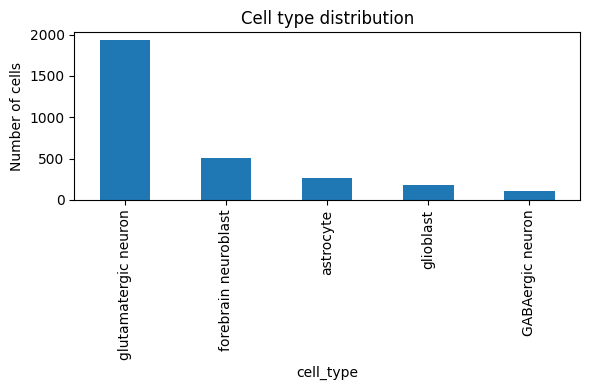

In [9]:
# Plotting cell type distribution
data.obs[celltype_column].value_counts().plot.bar(figsize=(6,4))
plt.ylabel("Number of cells")
plt.title("Cell type distribution")
plt.tight_layout()
plt.show()

=== Step-by-step normalization (per guide) ===

=== Overview AFTER normalization ===


,stage,min,max,mean,median,std
0,raw_counts,0.0,3861.000000,0.230898,0.0,2.924912
1,normalized,0.0,12.714056,0.476789,0.0,1.535863


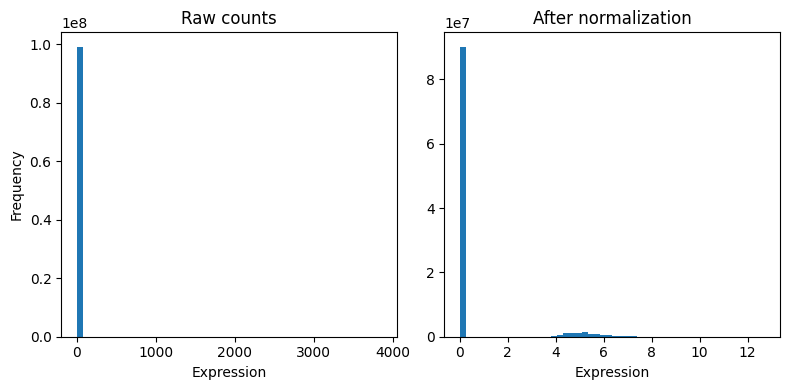


=== Gene filtering (>=10% of cells) ===
Genes kept: 13080 / 1
New shape: (2988, 13080)

=== Overview AFTER filtering ===


,stage,min,max,mean,median,std
0,raw_counts,0.0,3861.000000,0.230898,0.0,2.924912
1,normalized,0.0,12.714056,0.476789,0.0,1.535863
2,filtered,0.0,12.714056,1.190329,0.0,2.247131


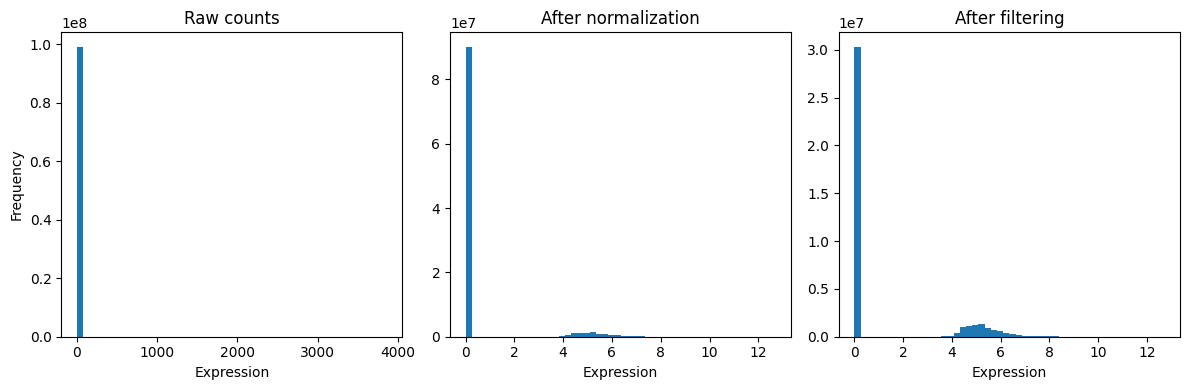

In [10]:
### Data Processing
# Step-by-step manual normalization and filtering

print("=== Step-by-step normalization (per guide) ===")

# Save raw counts BEFORE normalization (for overview table/plot later)
data.layers["counts"] = data.X.copy()

# Normalization
# 1) Divide by sum of reads per cell
try:
    data.X = data.X / data.X.sum(axis=1)
except Exception:
    # Guide workaround for CSR/CSC issues
    data.X = (data.X / data.X.sum(axis=1)).tocsr()

# 2) Multiply by 1 million (1e6)
data.X = data.X * 1e6

# 3) Log normalize
data.X = np.log1p(data.X)

# 4) Convert to CSR
if hasattr(data.X, "tocsr"):
    data.X = data.X.tocsr()

# Visuals normalization (table + plot)

print("\n=== Overview AFTER normalization ===")

raw_vals = data.layers["counts"].toarray().ravel() if hasattr(data.layers["counts"], "toarray") else data.layers["counts"].ravel()
norm_vals = data.X.toarray().ravel() if hasattr(data.X, "toarray") else data.X.ravel()

summary_norm = pd.DataFrame({
    "stage": ["raw_counts", "normalized"],
    "min":   [raw_vals.min(),  norm_vals.min()],
    "max":   [raw_vals.max(),  norm_vals.max()],
    "mean":  [raw_vals.mean(), norm_vals.mean()],
    "median":[np.median(raw_vals), np.median(norm_vals)],
    "std":   [raw_vals.std(),  norm_vals.std()],
})
display(summary_norm)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.hist(raw_vals, bins=50)
plt.title("Raw counts")
plt.xlabel("Expression")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
plt.hist(norm_vals, bins=50)
plt.title("After normalization")
plt.xlabel("Expression")
plt.tight_layout()
plt.show()

# Filtering

print("\n=== Gene filtering (>=10% of cells) ===")

n_cells = data.shape[0]
gene_sums = data.X.sum(axis=0)

# flatten gene_sums to 1D
# gene_sums = gene_sums.A1 if hasattr(gene_sums, "A1") else np.asarray(gene_sums).ravel()

keep = gene_sums > (0.10 * n_cells)
data = data[:, keep].copy()

print(f"Genes kept: {keep.sum()} / {len(keep)}")
print(f"New shape: {data.shape}")

# Visuals filtering (table + plot)

print("\n=== Overview AFTER filtering ===")

filt_vals = data.X.toarray().ravel() if hasattr(data.X, "toarray") else data.X.ravel()

summary_filt = pd.DataFrame({
    "stage": ["raw_counts", "normalized", "filtered"],
    "min":   [raw_vals.min(),   norm_vals.min(),   filt_vals.min()],
    "max":   [raw_vals.max(),   norm_vals.max(),   filt_vals.max()],
    "mean":  [raw_vals.mean(),  norm_vals.mean(),  filt_vals.mean()],
    "median":[np.median(raw_vals), np.median(norm_vals), np.median(filt_vals)],
    "std":   [raw_vals.std(),   norm_vals.std(),   filt_vals.std()],
})
display(summary_filt)

plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.hist(raw_vals, bins=50)
plt.title("Raw counts")
plt.xlabel("Expression")
plt.ylabel("Frequency")

plt.subplot(1,3,2)
plt.hist(norm_vals, bins=50)
plt.title("After normalization")
plt.xlabel("Expression")

plt.subplot(1,3,3)
plt.hist(filt_vals, bins=50)
plt.title("After filtering")
plt.xlabel("Expression")

plt.tight_layout()
plt.show()

In [11]:
# Training ML Model
# Extract Features (X) and Labels (Y)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Determine cell type column (update this if different)
celltype_column = 'cell_type'  # Adjust based on your dataset

# Extract features (gene expression matrix)
X = data.X
if hasattr(X, 'toarray'):
    X = X.toarray()  # Convert sparse to dense

print(f"Feature matrix (X) shape: {X.shape}")
print(f"Type: {type(X)}")

# Extract labels (cell types)
Y_raw = data.obs[celltype_column].values
print(f"\nLabel array (Y) shape: {Y_raw.shape}")
print(f"Unique cell types: {np.unique(Y_raw)}")
print(f"Number of cell types: {len(np.unique(Y_raw))}")

# Encode labels as integers (sklearn requires this for some algorithms)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y_raw)

print(f"\nLabel encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} -> {i}")

Feature matrix (X) shape: (2988, 13080)
Type: <class 'numpy.ndarray'>

Label array (Y) shape: (2988,)
Unique cell types: ['GABAergic neuron' 'astrocyte' 'forebrain neuroblast' 'glioblast'
 'glutamatergic neuron']
Number of cell types: 5

Label encoding:
  GABAergic neuron -> 0
  astrocyte -> 1
  forebrain neuroblast -> 2
  glioblast -> 3
  glutamatergic neuron -> 4


In [12]:
# Subset the data in Train and Test
# Split data: 70% train, 30% test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=42,
    stratify=Y  # Maintain class proportions
)

print("\n" + "=" * 50)
print("TRAIN/TEST SPLIT")
print("=" * 50)
print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test samples: {X_test.shape[0]} ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Check class distribution
print(f"\nClass distribution in training set:")
for i, label in enumerate(label_encoder.classes_):
    count = (Y_train == i).sum()
    print(f"  {label}: {count} ({count/len(Y_train)*100:.1f}%)")

print(f"\nClass distribution in test set:")
for i, label in enumerate(label_encoder.classes_):
    count = (Y_test == i).sum()
    print(f"  {label}: {count} ({count/len(Y_test)*100:.1f}%)")



TRAIN/TEST SPLIT
Total samples: 2988
Training samples: 2091 (70.0%)
Test samples: 897 (30.0%)

Class distribution in training set:
  GABAergic neuron: 75 (3.6%)
  astrocyte: 185 (8.8%)
  forebrain neuroblast: 356 (17.0%)
  glioblast: 123 (5.9%)
  glutamatergic neuron: 1352 (64.7%)

Class distribution in test set:
  GABAergic neuron: 32 (3.6%)
  astrocyte: 79 (8.8%)
  forebrain neuroblast: 153 (17.1%)
  glioblast: 53 (5.9%)
  glutamatergic neuron: 580 (64.7%)


In [13]:
# Training Logistic Regression 
from sklearn.linear_model import LogisticRegression

print("\n" + "=" * 50)
print("MODEL TRAINING")
print("=" * 50)

# Design the model
model = LogisticRegression(
    max_iter=1000,      # Maximum iterations for convergence
    random_state=42,    # For reproducibility
    verbose=1,          # Show training progress
    n_jobs=-1           # Use all CPU cores
)

print("Training logistic regression model...")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {len(label_encoder.classes_)}")

# Train the model
model.fit(X_train, Y_train)

print("\n✓ Model training complete!")
print(f"Converged: {model.n_iter_}")
print(f"Model coefficients shape: {model.coef_.shape}")


MODEL TRAINING
Training logistic regression model...
Features: 13080
Classes: 5


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        65405     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60944D+00    |proj g|=  4.93920D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
65405     27     32      1     0     0   9.476D-05   4.714D-04
  F =   4.7141423163852636E-004

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

✓ Model training complete!
Converged: [27]
Model coefficients shape: (5, 13080)


In [14]:
# Checking the model parameters
# Examine learned weights
print("\n" + "=" * 50)
print("MODEL PARAMETERS")
print("=" * 50)

print(f"Number of classes: {len(model.classes_)}")
print(f"Classes: {model.classes_}")
print(f"\nCoefficient matrix shape: {model.coef_.shape}")
print(f"  (rows = classes, columns = genes)")
print(f"\nIntercept shape: {model.intercept_.shape}")

# Find most important genes for each class (top weights)
for i, class_label in enumerate(label_encoder.classes_):
    weights = model.coef_[i]
    top_gene_indices = np.argsort(np.abs(weights))[-5:][::-1]
    
    print(f"\nTop 5 genes for predicting '{class_label}':")
    for rank, gene_idx in enumerate(top_gene_indices, 1):
        gene_name = data.var_names[gene_idx]
        weight = weights[gene_idx]
        print(f"  {rank}. {gene_name}: weight = {weight:.4f}")


MODEL PARAMETERS
Number of classes: 5
Classes: [0 1 2 3 4]

Coefficient matrix shape: (5, 13080)
  (rows = classes, columns = genes)

Intercept shape: (5,)

Top 5 genes for predicting 'GABAergic neuron':
  1. ENSG00000021645: weight = 0.0549
  2. ENSG00000231764: weight = 0.0482
  3. ENSG00000105880: weight = 0.0423
  4. ENSG00000136750: weight = 0.0410
  5. ENSG00000114115: weight = 0.0345

Top 5 genes for predicting 'astrocyte':
  1. ENSG00000125148: weight = 0.0363
  2. ENSG00000026025: weight = 0.0341
  3. ENSG00000101134: weight = 0.0338
  4. ENSG00000120885: weight = 0.0337
  5. ENSG00000114315: weight = 0.0321

Top 5 genes for predicting 'forebrain neuroblast':
  1. ENSG00000133636: weight = 0.0660
  2. ENSG00000163508: weight = 0.0583
  3. ENSG00000178403: weight = 0.0510
  4. ENSG00000090932: weight = 0.0447
  5. ENSG00000180616: weight = 0.0436

Top 5 genes for predicting 'glioblast':
  1. ENSG00000104435: weight = -0.0306
  2. ENSG00000067715: weight = -0.0259
  3. ENSG0000

In [15]:
# Assessing perfomance on the test subset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n" + "=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

# Predict on training subset (Where we fit the model: So seen data)
Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Predict on test subset (Unseen data)
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Seen - > Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Unseen -> Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("\n⚠ Warning: Large gap between train and test accuracy suggests overfitting!")
else:
    print("\n✓ Model generalizes well to unseen data")


MODEL EVALUATION
Seen - > Training Accuracy: 1.0000 (100.00%)
Unseen -> Test Accuracy: 0.9220 (92.20%)

✓ Model generalizes well to unseen data


In [16]:
# Detailed test performance 

import sklearn.metrics as skm
from math import ceil
from scipy import stats

# Predictions on test set
Y_test_hat = model.predict(X_test)

# Decode integer labels back to cell type strings
Y_test_lbl = label_encoder.inverse_transform(Y_test)
Y_test_hat_lbl = label_encoder.inverse_transform(Y_test_hat)

print("Overall test accuracy:", skm.accuracy_score(Y_test_lbl, Y_test_hat_lbl))

# Per-class accuracy table (exactly the structure your professor describes)
eval = []
for ct in set(Y_test_lbl):
    idx = [i for i, cx in enumerate(Y_test_lbl) if cx == ct]
    res = pd.DataFrame({
        "cell_type": ct,
        "accuracy": sum([Y_test_hat_lbl[i] == ct for i in idx]) / len(idx),
        "number": len(idx)
    }, index=[0])
    eval.append(res)

eval = pd.concat(eval, ignore_index=True)
print(eval.sort_values(["accuracy", "number"], ascending=[True, False]))


Overall test accuracy: 0.9219620958751393
              cell_type  accuracy  number
1             glioblast  0.754717      53
0  forebrain neuroblast  0.758170     153
2  glutamatergic neuron  0.968966     580
3             astrocyte  0.974684      79
4      GABAergic neuron  1.000000      32


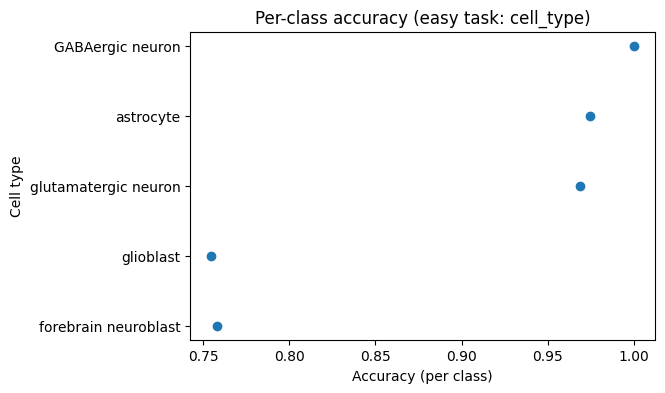

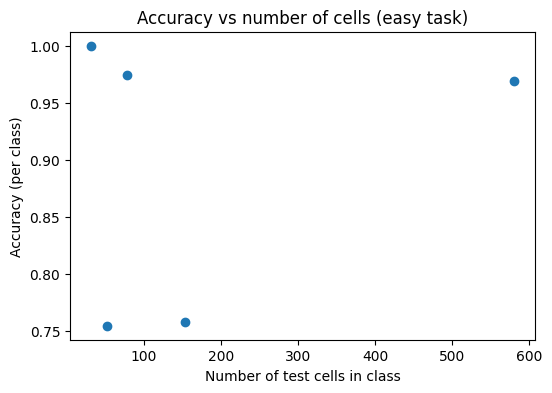

Pearson r = 0.243, p = 0.693


In [17]:
# Visuals -> Plot: accuracy (x) vs cell_type (y)
plt.figure(figsize=(6, max(4, 0.25 * eval.shape[0])))
plt.scatter(eval.accuracy, eval.cell_type)
plt.xlabel("Accuracy (per class)")
plt.ylabel("Cell type")
plt.title("Per-class accuracy (easy task: cell_type)")
plt.show()

# Visuals -> Plot: accuracy vs number of cells + Pearson correlation
plt.figure(figsize=(6, 4))
plt.scatter(eval.number, eval.accuracy)
plt.xlabel("Number of test cells in class")
plt.ylabel("Accuracy (per class)")
plt.title("Accuracy vs number of cells (easy task)")
plt.show()

r, p = stats.pearsonr(eval.number, eval.accuracy)
print(f"Pearson r = {r:.3f}, p = {p:.3g}")

In [18]:
# Classification report
print("\nClassification report (easy task):")
print(skm.classification_report(Y_test_lbl, Y_test_hat_lbl, digits=3))


Classification report (easy task):
                      precision    recall  f1-score   support

    GABAergic neuron      1.000     1.000     1.000        32
           astrocyte      0.856     0.975     0.911        79
forebrain neuroblast      0.859     0.758     0.806       153
           glioblast      0.889     0.755     0.816        53
glutamatergic neuron      0.945     0.969     0.957       580

            accuracy                          0.922       897
           macro avg      0.910     0.891     0.898       897
        weighted avg      0.921     0.922     0.920       897




AUC per cell type (easy task):
GABAergic neuron 1.0
astrocyte 0.9969360279780879
forebrain neuroblast 0.9790217162133671
glioblast 0.9921756237145667
glutamatergic neuron 0.9886924834112912


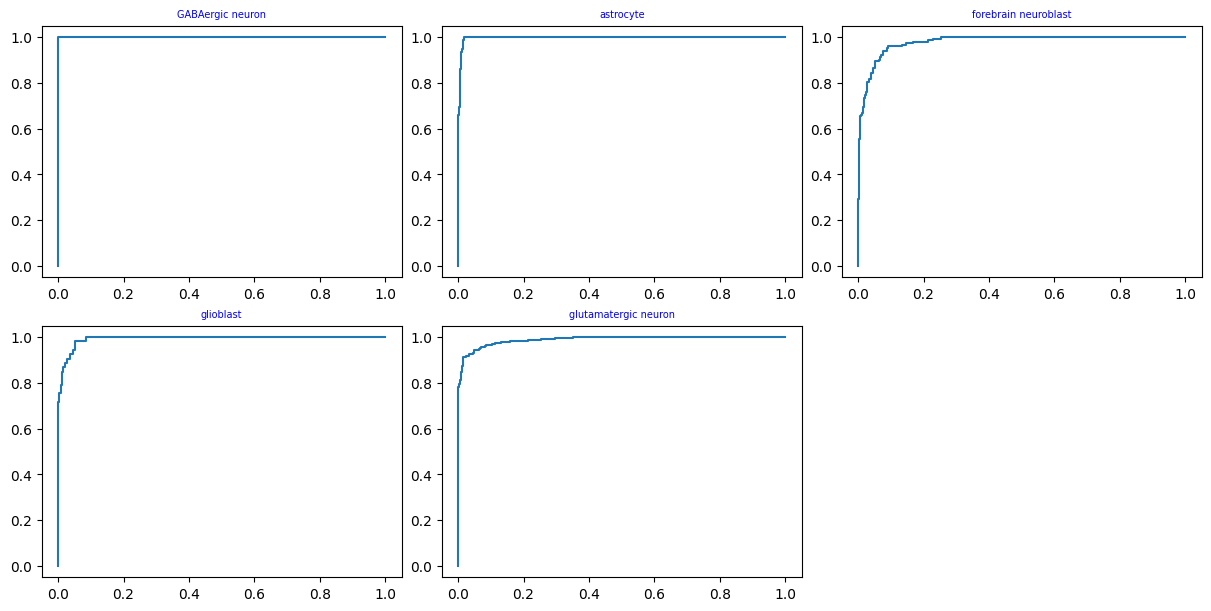

In [19]:
# Visuals -> ROC curves + AUC for each cell type (one-vs-rest)
Y_test_hat_probs = model.predict_proba(X_test)
classes_enc = model.classes_  # encoded labels (ints)
classes_lbl = label_encoder.inverse_transform(classes_enc)

n_classes = len(classes_lbl)
n_cols = 3
n_rows = ceil(n_classes / n_cols)

fig, axs = plt.subplots(n_rows, n_cols, constrained_layout=True, figsize=(4*n_cols, 3*n_rows))
axs = np.array(axs).flatten()

print("\nAUC per cell type (easy task):")
for i, cl_name in enumerate(classes_lbl):
    fpr, tpr, thresholds = skm.roc_curve(
        [0 + (x == cl_name) for x in Y_test_lbl],
        Y_test_hat_probs[:, i]
    )
    axs[i].plot(fpr, tpr)
    axs[i].set_title(cl_name, fontdict={'color': 'blue', 'size': 7})
    auc_val = skm.auc(fpr, tpr)
    print(cl_name, auc_val)

# turn off unused axes
for j in range(n_classes, len(axs)):
    axs[j].axis("off")

plt.show()

In [20]:
# Save the predictions "Easy Model"
row_id = np.arange(len(Y_test))

Y_test_hat = model.predict(X_test)

easy_pred_df = pd.DataFrame({
    "row_id": row_id,
    "true_cell_type": label_encoder.inverse_transform(Y_test),
    "pred_cell_type": label_encoder.inverse_transform(Y_test_hat),
    "easy_max_prob": model.predict_proba(X_test).max(axis=1)
})

easy_pred_df.to_csv("predictions_easy_cell_type.csv", index=False)
print("Saved:", "predictions_easy_cell_type.csv")
easy_pred_df.head()

Saved: predictions_easy_cell_type.csv


,row_id,true_cell_type,pred_cell_type,easy_max_prob
0,0,glutamatergic neuron,glutamatergic neuron,1.000000
1,1,glutamatergic neuron,glutamatergic neuron,1.000000
2,2,forebrain neuroblast,forebrain neuroblast,0.998538
3,3,forebrain neuroblast,glutamatergic neuron,0.985603
4,4,glutamatergic neuron,glutamatergic neuron,1.000000


In [21]:
# Train the ml model in a more difficult task
# Use 'author_cell_type' instead of 'cell_type'
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Determine cell type column (update this if different)
celltype_column = 'author_cell_type'  # Adjust based on your dataset

# Extract features (gene expression matrix)
X = data.X
if hasattr(X, 'toarray'):
    X = X.toarray()  # Convert sparse to dense

print(f"Feature matrix (X) shape: {X.shape}")
print(f"Type: {type(X)}")

# Extract labels (cell types)
Y_raw = data.obs[celltype_column].values
print(f"\nLabel array (Y) shape: {Y_raw.shape}")
print(f"Unique cell types: {np.unique(Y_raw)}")
print(f"Number of cell types: {len(np.unique(Y_raw))}")

# Encode labels as integers (sklearn requires this for some algorithms)
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(Y_raw)

print(f"\nLabel encoding:")
for i, label in enumerate(label_encoder.classes_):
    print(f"  {label} -> {i}")


Feature matrix (X) shape: (2988, 13080)
Type: <class 'numpy.ndarray'>

Label array (Y) shape: (2988,)
Unique cell types: ['Astrocytes' 'Glioblasts' 'Neuroblasts - NHLH1 1' 'Neuroblasts - NHLH1 2'
 'Neuroblasts - NHLH2' 'Neurons - GABAergic'
 'Neurons - glutamatergic deep layer 1'
 'Neurons - glutamatergic deep layer 2'
 'Neurons - glutamatergic deep layer 3'
 'Neurons - glutamatergic deep layer, epithelial-like'
 'Neurons - glutamatergic upper layer 1'
 'Neurons - glutamatergic upper layer 2'
 'Neurons - glutamatergic upper layer 3']
Number of cell types: 13

Label encoding:
  Astrocytes -> 0
  Glioblasts -> 1
  Neuroblasts - NHLH1 1 -> 2
  Neuroblasts - NHLH1 2 -> 3
  Neuroblasts - NHLH2 -> 4
  Neurons - GABAergic -> 5
  Neurons - glutamatergic deep layer 1 -> 6
  Neurons - glutamatergic deep layer 2 -> 7
  Neurons - glutamatergic deep layer 3 -> 8
  Neurons - glutamatergic deep layer, epithelial-like -> 9
  Neurons - glutamatergic upper layer 1 -> 10
  Neurons - glutamatergic upper l

In [22]:
# Subset the data in Train and Test
# Split data: 70% train, 30% test
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.3,
    random_state=42,
    stratify=Y  # Maintain class proportions
)

print("\n" + "=" * 50)
print("TRAIN/TEST SPLIT")
print("=" * 50)
print(f"Total samples: {X.shape[0]}")
print(f"Training samples: {X_train.shape[0]} ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Test samples: {X_test.shape[0]} ({X_test.shape[0]/X.shape[0]*100:.1f}%)")

# Check class distribution
print(f"\nClass distribution in training set:")
for i, label in enumerate(label_encoder.classes_):
    count = (Y_train == i).sum()
    print(f"  {label}: {count} ({count/len(Y_train)*100:.1f}%)")

print(f"\nClass distribution in test set:")
for i, label in enumerate(label_encoder.classes_):
    count = (Y_test == i).sum()
    print(f"  {label}: {count} ({count/len(Y_test)*100:.1f}%)")



TRAIN/TEST SPLIT
Total samples: 2988
Training samples: 2091 (70.0%)
Test samples: 897 (30.0%)

Class distribution in training set:
  Astrocytes: 185 (8.8%)
  Glioblasts: 123 (5.9%)
  Neuroblasts - NHLH1 1: 137 (6.6%)
  Neuroblasts - NHLH1 2: 124 (5.9%)
  Neuroblasts - NHLH2: 95 (4.5%)
  Neurons - GABAergic: 75 (3.6%)
  Neurons - glutamatergic deep layer 1: 95 (4.5%)
  Neurons - glutamatergic deep layer 2: 190 (9.1%)
  Neurons - glutamatergic deep layer 3: 181 (8.7%)
  Neurons - glutamatergic deep layer, epithelial-like: 217 (10.4%)
  Neurons - glutamatergic upper layer 1: 219 (10.5%)
  Neurons - glutamatergic upper layer 2: 134 (6.4%)
  Neurons - glutamatergic upper layer 3: 316 (15.1%)

Class distribution in test set:
  Astrocytes: 79 (8.8%)
  Glioblasts: 53 (5.9%)
  Neuroblasts - NHLH1 1: 59 (6.6%)
  Neuroblasts - NHLH1 2: 53 (5.9%)
  Neuroblasts - NHLH2: 41 (4.6%)
  Neurons - GABAergic: 32 (3.6%)
  Neurons - glutamatergic deep layer 1: 41 (4.6%)
  Neurons - glutamatergic deep layer

In [23]:
# Training Logistic Regression 
from sklearn.linear_model import LogisticRegression

print("\n" + "=" * 50)
print("MODEL TRAINING")
print("=" * 50)

# Design the model
model = LogisticRegression(
    max_iter=1000,      # Maximum iterations for convergence
    random_state=42,    # For reproducibility
    verbose=1,          # Show training progress
    n_jobs=-1           # Use all CPU cores
)

print("Training logistic regression model...")
print(f"Features: {X_train.shape[1]}")
print(f"Classes: {len(label_encoder.classes_)}")

# Train the model
model.fit(X_train, Y_train)

print("\n✓ Model training complete!")
print(f"Converged: {model.n_iter_}")
print(f"Model coefficients shape: {model.coef_.shape}")


MODEL TRAINING
Training logistic regression model...
Features: 13080
Classes: 13


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =       170053     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.56495D+00    |proj g|=  8.56277D-01


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
*****     44     47      1     0     0   7.948D-05   1.170D-03
  F =   1.1704527403717719E-003

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

✓ Model training complete!
Converged: [44]
Model coefficients shape: (13, 13080)


In [24]:
# Checking the model parameters
# Examine learned weights
print("\n" + "=" * 50)
print("MODEL PARAMETERS")
print("=" * 50)

print(f"Number of classes: {len(model.classes_)}")
print(f"Classes: {model.classes_}")
print(f"\nCoefficient matrix shape: {model.coef_.shape}")
print(f"  (rows = classes, columns = genes)")
print(f"\nIntercept shape: {model.intercept_.shape}")

# Find most important genes for each class (top weights)
for i, class_label in enumerate(label_encoder.classes_):
    weights = model.coef_[i]
    top_gene_indices = np.argsort(np.abs(weights))[-5:][::-1]
    
    print(f"\nTop 5 genes for predicting '{class_label}':")
    for rank, gene_idx in enumerate(top_gene_indices, 1):
        gene_name = data.var_names[gene_idx]
        weight = weights[gene_idx]
        print(f"  {rank}. {gene_name}: weight = {weight:.4f}")


MODEL PARAMETERS
Number of classes: 13
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]

Coefficient matrix shape: (13, 13080)
  (rows = classes, columns = genes)

Intercept shape: (13,)

Top 5 genes for predicting 'Astrocytes':
  1. ENSG00000125148: weight = 0.0476
  2. ENSG00000026025: weight = 0.0466
  3. ENSG00000104435: weight = -0.0461
  4. ENSG00000120885: weight = 0.0423
  5. ENSG00000132692: weight = 0.0402

Top 5 genes for predicting 'Glioblasts':
  1. ENSG00000104435: weight = -0.0440
  2. ENSG00000171476: weight = 0.0354
  3. ENSG00000033122: weight = -0.0354
  4. ENSG00000103260: weight = 0.0342
  5. ENSG00000164600: weight = -0.0342

Top 5 genes for predicting 'Neuroblasts - NHLH1 1':
  1. ENSG00000106341: weight = 0.0543
  2. ENSG00000163508: weight = 0.0430
  3. ENSG00000180616: weight = 0.0419
  4. ENSG00000023171: weight = 0.0416
  5. ENSG00000156687: weight = 0.0368

Top 5 genes for predicting 'Neuroblasts - NHLH1 2':
  1. ENSG00000163508: weight = 0.0366
  2. ENSG

In [25]:
# Assessing perfomance on the test subset
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n" + "=" * 50)
print("MODEL EVALUATION")
print("=" * 50)

# Predict on training subset (Where we fit the model: So seen data)
Y_train_pred = model.predict(X_train)
train_accuracy = accuracy_score(Y_train, Y_train_pred)

# Predict on test subset (Unseen data)
Y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print(f"Harder Task - Seen - > Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Harder Task - Unseen -> Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

# Check for overfitting
if train_accuracy - test_accuracy > 0.1:
    print("\n⚠ Warning: Large gap between train and test accuracy suggests overfitting!")
else:
    print("\n✓ Model generalizes well to unseen data")


MODEL EVALUATION
Harder Task - Seen - > Training Accuracy: 1.0000 (100.00%)
Harder Task - Unseen -> Test Accuracy: 0.8239 (82.39%)

⚠ Warning: Large gap between train and test accuracy suggests overfitting!


In [26]:
### Test subset evaluation + Detailed per class evaluation + ROC / AUC Visuals (as Git instructions: Another way to see them)
# Evaluate on the test set (predictions + overall accuracy)
import sklearn.metrics as skm


# Predict labels on test set (these are encoded integers)
Y_test_hat = model.predict(X_test)

# Decode to original string labels (author_cell_type names)
Y_test_lbl = label_encoder.inverse_transform(Y_test)
Y_test_hat_lbl = label_encoder.inverse_transform(Y_test_hat)

print("Test accuracy (overall):", skm.accuracy_score(Y_test_lbl, Y_test_hat_lbl))

Test accuracy (overall): 0.8238573021181717


In [27]:
# More detailed evaluation: per-class accuracy 
eval = []

for ct in set(Y_test_lbl):
    idx = [i for i, cx in enumerate(Y_test_lbl) if cx == ct]
    res = pd.DataFrame({
        "cell_type": ct,
        "accuracy": sum([Y_test_hat_lbl[i] == ct for i in idx]) / len(idx),
        "number": len(idx)
    }, index=[0])
    eval.append(res)

eval = pd.concat(eval, ignore_index=True)

print(eval.sort_values("accuracy"))

                                            cell_type  accuracy  number
6               Neurons - glutamatergic upper layer 2  0.413793      58
8                Neurons - glutamatergic deep layer 1  0.682927      41
12               Neurons - glutamatergic deep layer 2  0.765432      81
0                                 Neuroblasts - NHLH2  0.780488      41
1                Neurons - glutamatergic deep layer 3  0.782051      78
9                               Neuroblasts - NHLH1 2  0.792453      53
11              Neurons - glutamatergic upper layer 3  0.866667     135
4                                          Glioblasts  0.867925      53
7               Neurons - glutamatergic upper layer 1  0.872340      94
2                               Neuroblasts - NHLH1 1  0.898305      59
3                                 Neurons - GABAergic  0.906250      32
5                                          Astrocytes  0.911392      79
10  Neurons - glutamatergic deep layer, epithelial...  0.978495 

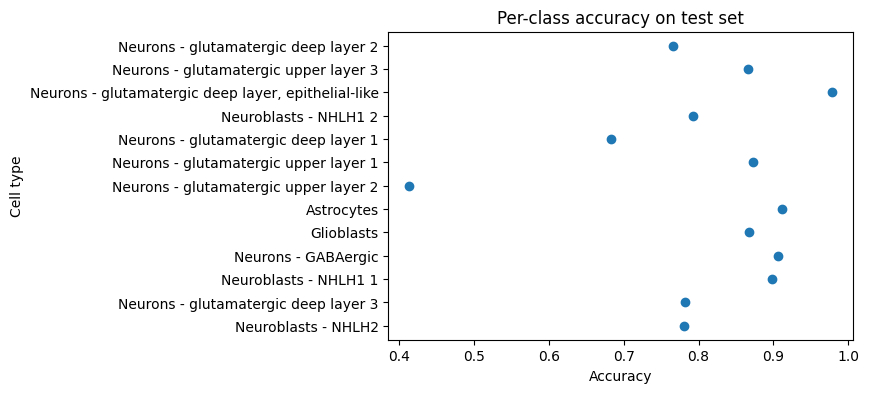

In [28]:
# Visuals -> Scatter Plot: accuracy (x) vs cell_type (y)

plt.figure(figsize=(6, max(4, 0.25 * eval.shape[0])))
plt.scatter(eval.accuracy, eval.cell_type)
plt.xlabel("Accuracy")
plt.ylabel("Cell type")
plt.title("Per-class accuracy on test set")
plt.show()

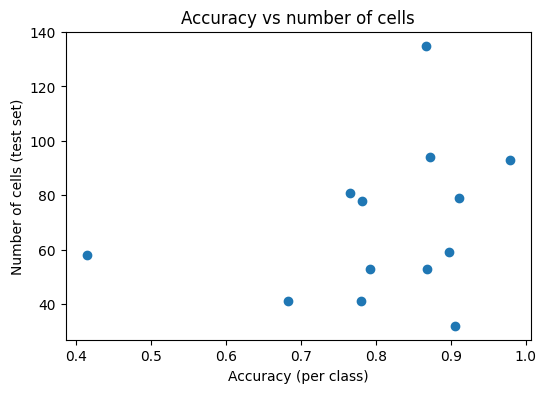

Pearson r = 0.274, p = 0.364


In [29]:
# Visuals -> Scatter plot: accuracy vs number of cells + Pearson correlation

from scipy import stats

plt.figure(figsize=(6, 4))
plt.scatter(eval.accuracy, eval.number)
plt.xlabel("Accuracy (per class)")
plt.ylabel("Number of cells (test set)")
plt.title("Accuracy vs number of cells")
plt.show()

r, p = stats.pearsonr(eval.accuracy, eval.number)
print(f"Pearson r = {r:.3f}, p = {p:.3g}")

In [30]:
# Classification report (precision/recall/f1 per class)
print(skm.classification_report(Y_test_lbl, Y_test_hat_lbl, digits=3))

                                                     precision    recall  f1-score   support

                                         Astrocytes      0.911     0.911     0.911        79
                                         Glioblasts      0.793     0.868     0.829        53
                              Neuroblasts - NHLH1 1      0.883     0.898     0.891        59
                              Neuroblasts - NHLH1 2      0.824     0.792     0.808        53
                                Neuroblasts - NHLH2      0.842     0.780     0.810        41
                                Neurons - GABAergic      1.000     0.906     0.951        32
               Neurons - glutamatergic deep layer 1      0.903     0.683     0.778        41
               Neurons - glutamatergic deep layer 2      0.795     0.765     0.780        81
               Neurons - glutamatergic deep layer 3      0.824     0.782     0.803        78
Neurons - glutamatergic deep layer, epithelial-like      0.919     0.

Astrocytes 0.9973074185261985
Glioblasts 0.994411159796119
Neuroblasts - NHLH1 1 0.9972493022126936
Neuroblasts - NHLH1 2 0.9952383081462934
Neuroblasts - NHLH2 0.9943868247093686
Neurons - GABAergic 0.999385838150289
Neurons - glutamatergic deep layer 1 0.9919079097333029
Neurons - glutamatergic deep layer 2 0.9862321471798596
Neurons - glutamatergic deep layer 3 0.9835321373782913
Neurons - glutamatergic deep layer, epithelial-like 0.9990638206815385
Neurons - glutamatergic upper layer 1 0.9925015235420366
Neurons - glutamatergic upper layer 2 0.9677366322798077
Neurons - glutamatergic upper layer 3 0.9687372411781862


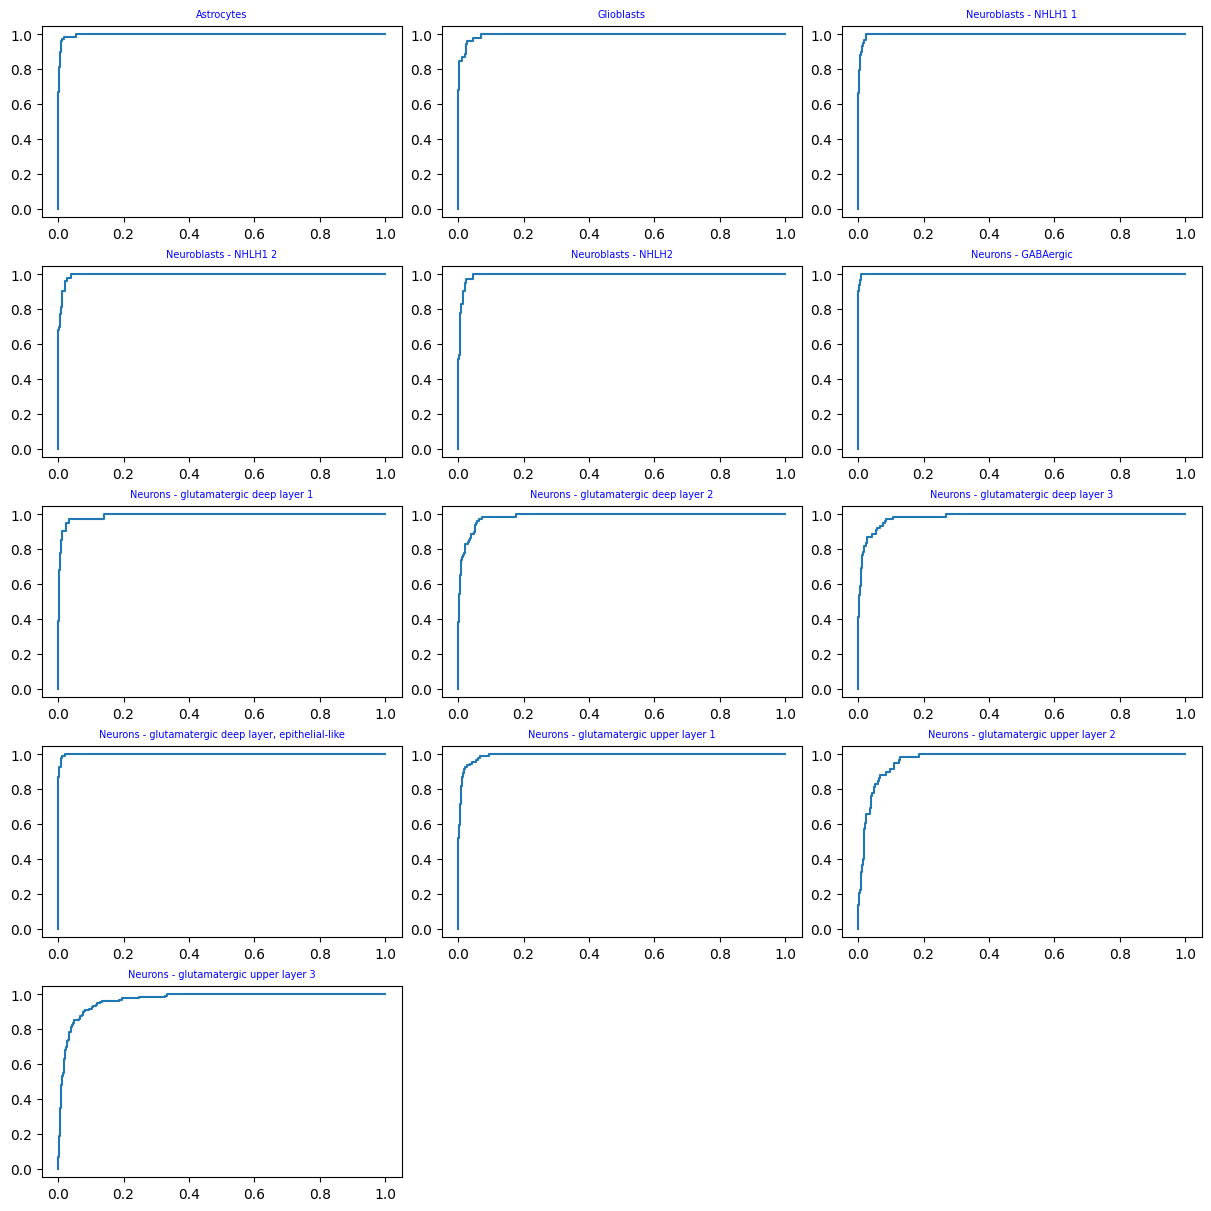

In [31]:
# Visuals -> ROC AUC evaluation: ROC curve per cell type + AUC

import matplotlib.pyplot as plt

Y_test_hat_probs = model.predict_proba(X_test)

fig, axs = plt.subplots(5, 3, constrained_layout=True, figsize=(12, 12))

# Note: professor asked for 15 slots; if you have >15 classes, this will plot first 15.
for i, cl in enumerate(model.classes_[:15]):
    cl_name = label_encoder.inverse_transform([cl])[0]

    fpr, tpr, thresholds = skm.roc_curve(
        [0 + (x == cl_name) for x in Y_test_lbl],
        Y_test_hat_probs[:, i]
    )

    ax = axs.flatten()[i]
    ax.plot(fpr, tpr)
    ax.set_title(cl_name, fontdict={'color':'blue','size':7})

    print(cl_name, skm.auc(fpr, tpr))

# Turn off any unused axes (if <15 classes)
for j in range(len(model.classes_[:15]), 15):
    axs.flatten()[j].axis("off")

plt.show()

In [32]:
# Save predictions harder model
row_id = np.arange(len(Y_test))

Y_test_hat = model.predict(X_test)

hard_pred_df = pd.DataFrame({
    "row_id": row_id,
    "true_author_cell_type": label_encoder.inverse_transform(Y_test),
    "pred_author_cell_type": label_encoder.inverse_transform(Y_test_hat),
    "hard_max_prob": model.predict_proba(X_test).max(axis=1)
})

hard_pred_df.to_csv("predictions_hard_author_cell_type.csv", index=False)
print("Saved:", "predictions_hard_author_cell_type.csv")
hard_pred_df.head()

Saved: predictions_hard_author_cell_type.csv


,row_id,true_author_cell_type,pred_author_cell_type,hard_max_prob
0,0,Neurons - glutamatergic upper layer 1,Neurons - glutamatergic upper layer 1,0.736261
1,1,Neurons - glutamatergic upper layer 2,Neurons - glutamatergic upper layer 1,0.996401
2,2,Neuroblasts - NHLH2,Neurons - glutamatergic upper layer 3,0.347399
3,3,"Neurons - glutamatergic deep layer, epithelial...","Neurons - glutamatergic deep layer, epithelial...",0.999997
4,4,Neurons - glutamatergic deep layer 3,Neurons - glutamatergic deep layer 3,0.980333


In [33]:
# Merge EASY + HARD predictions into one table

merged_pred_df = easy_pred_df.merge(hard_pred_df, on="row_id", how="inner")

merged_pred_df.to_csv("predictions_easy_and_hard_merged.csv", index=False)
print("Saved:", "predictions_easy_and_hard_merged.csv")
merged_pred_df.head()

Saved: predictions_easy_and_hard_merged.csv


,row_id,true_cell_type,pred_cell_type,easy_max_prob,true_author_cell_type,pred_author_cell_type,hard_max_prob
0,0,glutamatergic neuron,glutamatergic neuron,1.000000,Neurons - glutamatergic upper layer 1,Neurons - glutamatergic upper layer 1,0.736261
1,1,glutamatergic neuron,glutamatergic neuron,1.000000,Neurons - glutamatergic upper layer 2,Neurons - glutamatergic upper layer 1,0.996401
2,2,forebrain neuroblast,forebrain neuroblast,0.998538,Neuroblasts - NHLH2,Neurons - glutamatergic upper layer 3,0.347399
3,3,forebrain neuroblast,glutamatergic neuron,0.985603,"Neurons - glutamatergic deep layer, epithelial...","Neurons - glutamatergic deep layer, epithelial...",0.999997
4,4,glutamatergic neuron,glutamatergic neuron,1.000000,Neurons - glutamatergic deep layer 3,Neurons - glutamatergic deep layer 3,0.980333
